In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import date, timedelta
import statistics

In [4]:
dataframe = pd.read_csv('big_data_added_columns.csv')
dataframe.head(20)

/var/folders/cw/hgq_4j310_x0341w_fpbn62m0000gp/T/ipykernel_21896/1048126044.py:1: DtypeWarning: Columns (23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('big_data_added_columns.csv')


,ROW_NUM,USER_ID,INV_OPEN_DATE,INV_NUM_ACCOUNTS,INV_ACC_BAL,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,MONEY_FICO,MONEY_DATA_UPDATE_DATE,MONEY_TOTAL_BALANCE,...,date_of_creating_new_columns,days_with_invest,days_with_money,days_with_relay,days_with_loan,days_with_credit,first_product,second_product,xbuy_days,xbuy_date
0,1.0,20278993.0,2021-10-09,1.0,503.99,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,542.0,NaN,543.0,NaN,NaN,relay,invest,1.0,2021-10-09
1,1.0,20278996.0,2021-10-03,1.0,2712.45,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,548.0,NaN,NaN,NaN,NaN,invest,NaN,NaN,NaN
2,1.0,20278999.0,NaN,NaN,NaN,2021-10-03,Active,9003.0,2023-04-02,1.21,...,2023-04-04,NaN,548.0,NaN,NaN,NaN,money,NaN,NaN,NaN
3,1.0,20279000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,548.0,NaN,NaN,relay,NaN,NaN,NaN
4,1.0,20279001.0,2021-10-04,2.0,376.95,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,547.0,NaN,NaN,NaN,NaN,invest,NaN,NaN,NaN
5,1.0,20279005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,NaN,547.0,NaN,loan,NaN,NaN,NaN
6,1.0,20279010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,NaN,547.0,NaN,loan,NaN,NaN,NaN
7,1.0,20279014.0,2021-10-03,1.0,1094.55,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,548.0,NaN,548.0,NaN,NaN,relay,invest,0.0,2021-10-03
8,1.0,20279020.0,2021-10-05,3.0,10343.57,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,546.0,NaN,NaN,NaN,NaN,invest,NaN,NaN,NaN
9,1.0,20279027.0,2021-10-03,1.0,3737.80,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,548.0,NaN,NaN,NaN,NaN,invest,NaN,NaN,NaN


In [6]:
dataframe.head(10)

,ROW_NUM,USER_ID,INV_OPEN_DATE,INV_NUM_ACCOUNTS,INV_ACC_BAL,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,MONEY_FICO,MONEY_DATA_UPDATE_DATE,MONEY_TOTAL_BALANCE,...,num_products,date_of_creating_new_columns,days_with_invest,days_with_money,RELAY_ORIGINAL_DATE,days_with_relay,days_with_loan,days_with_credit,xbuy_days,xbuy_date
0,1.0,20278993.0,2021-10-09,1.0,503.99,NaN,NaN,NaN,NaN,NaN,...,2,2023-04-04,542.0,NaN,2021-10-08,543.0,NaN,NaN,1.0,2021-10-09
1,1.0,20278996.0,2021-10-03,1.0,2712.45,NaN,NaN,NaN,NaN,NaN,...,1,2023-04-04,548.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,20278999.0,NaN,NaN,NaN,2021-10-03,Active,9003.0,2023-04-02,1.21,...,1,2023-04-04,NaN,548.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,20279000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2023-04-04,NaN,NaN,2021-10-03,548.0,NaN,NaN,NaN,NaN
4,1.0,20279001.0,2021-10-04,2.0,376.95,NaN,NaN,NaN,NaN,NaN,...,1,2023-04-04,547.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,20279005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2023-04-04,NaN,NaN,NaN,NaN,547.0,NaN,NaN,NaN
6,1.0,20279010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2023-04-04,NaN,NaN,NaN,NaN,547.0,NaN,NaN,NaN
7,1.0,20279014.0,2021-10-03,1.0,1094.55,NaN,NaN,NaN,NaN,NaN,...,2,2023-04-04,548.0,NaN,2021-10-03,548.0,NaN,NaN,0.0,2021-10-03
8,1.0,20279020.0,2021-10-05,3.0,10343.57,NaN,NaN,NaN,NaN,NaN,...,1,2023-04-04,546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,20279027.0,2021-10-03,1.0,3737.80,NaN,NaN,NaN,NaN,NaN,...,1,2023-04-04,548.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataframe.columns

Index(['ROW_NUM', 'USER_ID', 'INV_OPEN_DATE', 'INV_NUM_ACCOUNTS',
       'INV_ACC_BAL', 'MONEY_ACCOUNT_OPEN_DATE', 'MONEY_ACCOUNT_STATUS',
       'MONEY_FICO', 'MONEY_DATA_UPDATE_DATE', 'MONEY_TOTAL_BALANCE',
       'LAST_PAYMENT_DATE', 'ORIGINATION_DATE', 'PRINCIPAL', 'RELAY_FICO',
       'SL_ACTIVE_IND', 'PL_ACTIVE_IND', 'MORTGAGE_ACTIVE_IND',
       'BANKING_ACTIVE_IND', 'INVEST_ACTIVE_IND', 'CC_ACTIVE_IND',
       'CSM_ACTIVE_IND', 'ACTIVE', 'RELAY_OPEN_DATE',
       'ONBOARDING_SUCCESS_DATE', 'FIRST_TRANSACTION_DATE', 'CREDIT_LINE',
       'CURRENT_CYCLE_BEHAVIOR_SEGMENT', 'uses_invest', 'uses_money',
       'first_product', 'second_product', 'uses_relay', 'uses_loan',
       'uses_credit', 'num_products', 'date_of_creating_new_columns',
       'days_with_invest', 'days_with_money', 'RELAY_ORIGINAL_DATE',
       'days_with_relay', 'days_with_loan', 'days_with_credit', 'xbuy_days',
       'xbuy_date'],
      dtype='object')

In [12]:
def analyze_relay(product):
    df = dataframe[dataframe['first_product'] == 'relay']
    cols = list(df.columns[13:21]) # relay columns

    # identify the desired target product
    if(product == 'PL'):
        drop_columns = ['PL_ACTIVE_IND']
        #cols.append('REL_LOAN_SQS')
        df['response'] = (dataframe['second_product'] == 'loan')

    if(product == 'Money'):
        drop_columns = ['BANKING_ACTIVE_IND']
        #cols.append('REL_MON_SQS')
        df['response'] = (dataframe['second_product'] == 'money')

    cols.append('response') # response variable
    df = df[cols]
    df = df.drop(columns=drop_columns)
    df.fillna(False,inplace=True)

    #downsample the data to balance the response variable (uses_money) (majority are users that do not use money and only use 1 product)
    #df = analyze_relay('PL')
    # Separate majority class (uses_money = 0 and num_products = 1)
    data_majority = df[df['response'] == False]
    data_minority = df[df['response'] == True]

    # Downsample majority class
    data_majority_downsampled = resample(data_majority, 
                                        replace=False,    # sample without replacement
                                        n_samples=len(data_minority),     # to match minority class
                                        random_state=123) # reproducible results

    # Combine minority class with downsampled majority class
    data_downsampled = pd.concat([data_majority_downsampled, data_minority])

    ## model
    X_train, X_test, y_train, y_test = train_test_split(data_downsampled[data_downsampled.columns[:-1]], data_downsampled['response'], test_size=0.33, random_state=34)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # check the accuracy
    accuracy = "ACCURACY: "+str(accuracy_score(y_test, y_pred))

    # find coefficients
    coefs = pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_)), columns=['features', 'coef']) 

    # normalizing
    #for i in range(coefs.shape[0]):
        #coefs.iloc[i, 1] = math.exp(coefs.iloc[i, 1]) / (1 + math.exp(coefs.iloc[i, 1]))

    return coefs, accuracy, model, df



In [13]:
pl = analyze_relay('PL')
print(pl[1])
pl[0]

/var/folders/cw/hgq_4j310_x0341w_fpbn62m0000gp/T/ipykernel_16954/1753563003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = (dataframe['second_product'] == 'loan')


ACCURACY: 0.8173124484748557


,features,coef
0,RELAY_FICO,[0.01341822999767758]
1,SL_ACTIVE_IND,[-0.7635040533100884]
2,MORTGAGE_ACTIVE_IND,[0.026659573190998785]
3,BANKING_ACTIVE_IND,[-1.693668205846261]
4,INVEST_ACTIVE_IND,[-1.3308071358781208]
5,CC_ACTIVE_IND,[0.08868958489993618]
6,CSM_ACTIVE_IND,[-4.233082135665279]


potential issue with people being able to start relay tracking after they open the product of choice. so like they start tracking an additional product after they have already opened the app

In [19]:
data[data['response']==True]

,RELAY_FICO,SL_ACTIVE_IND,MORTGAGE_ACTIVE_IND,BANKING_ACTIVE_IND,INVEST_ACTIVE_IND,CC_ACTIVE_IND,CSM_ACTIVE_IND,response
38,673.0,False,False,False,False,False,True,True
88,673.0,False,False,False,False,False,True,True
171,685.0,False,False,False,False,False,True,True
284,800.0,False,False,False,False,False,True,True
391,638.0,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...
3265788,704.0,False,False,False,False,False,True,True
3265821,704.0,False,False,False,False,False,True,True
3265965,769.0,False,False,False,False,False,True,True
3265970,779.0,False,False,False,False,False,True,True


In [14]:
# Display new class counts
data = pl[3]
data['response'].value_counts()

False    1783960
True      128651
Name: response, dtype: int64

In [20]:
money = analyze_relay('Money')
print(money[1])
money[0]
# 0.6472421834102698 SQS Accuracy
# 0.6508907184441377 MQS Accuracy

/var/folders/cw/hgq_4j310_x0341w_fpbn62m0000gp/T/ipykernel_16954/1753563003.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = (dataframe['second_product'] == 'money')


ACCURACY: 0.6498947463048836


,features,coef
0,RELAY_FICO,[0.002622328779881655]
1,SL_ACTIVE_IND,[-1.2037833196177148]
2,PL_ACTIVE_IND,[-1.3263519648804105]
3,MORTGAGE_ACTIVE_IND,[-0.11645527764516984]
4,INVEST_ACTIVE_IND,[0.7231335614153351]
5,CC_ACTIVE_IND,[0.3714987208192425]
6,CSM_ACTIVE_IND,[-0.7375930849394834]


In [22]:
money[3]['response'].value_counts()

False    1508106
True      404505
Name: response, dtype: int64

In [5]:
xbuy = dataframe[pd.isnull(dataframe['xbuy_days']) != True]
xbuy.head(30)

,ROW_NUM,USER_ID,INV_OPEN_DATE,INV_NUM_ACCOUNTS,INV_ACC_BAL,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,MONEY_FICO,MONEY_DATA_UPDATE_DATE,MONEY_TOTAL_BALANCE,...,date_of_creating_new_columns,days_with_invest,days_with_money,days_with_relay,days_with_loan,days_with_credit,first_product,second_product,xbuy_days,xbuy_date
0,1.0,20278993.0,2021-10-09,1.0,503.99,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,542.0,NaN,543.0,NaN,NaN,relay,invest,1.0,2021-10-09
7,1.0,20279014.0,2021-10-03,1.0,1094.55,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,548.0,NaN,548.0,NaN,NaN,relay,invest,0.0,2021-10-03
15,1.0,20279040.0,2021-10-03,2.0,317619.37,2021-10-11,Active,647.0,2023-04-02,0.29,...,2023-04-04,548.0,540.0,548.0,519.0,NaN,relay,invest,0.0,2021-10-03
16,1.0,20279045.0,2021-10-07,2.0,5458.79,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,544.0,NaN,545.0,NaN,NaN,relay,invest,1.0,2021-10-07
17,1.0,20279053.0,NaN,NaN,NaN,2021-11-17,Active,456.0,2023-04-02,0.90,...,2023-04-04,NaN,503.0,503.0,NaN,NaN,relay,money,0.0,2021-11-17
19,1.0,20279070.0,2021-10-03,4.0,5413.05,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,548.0,NaN,548.0,NaN,NaN,relay,invest,0.0,2021-10-03
20,1.0,20279076.0,2021-10-05,2.0,92795.29,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,546.0,NaN,546.0,NaN,NaN,relay,invest,0.0,2021-10-05
21,1.0,20279092.0,NaN,NaN,NaN,2022-02-06,Active,800.0,2023-04-02,50.00,...,2023-04-04,NaN,422.0,548.0,NaN,NaN,relay,money,126.0,2022-02-06
22,1.0,20279094.0,2021-10-26,2.0,6470.37,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,525.0,NaN,548.0,NaN,NaN,relay,invest,23.0,2021-10-26
23,1.0,20279096.0,NaN,NaN,NaN,2021-10-12,Active,NaN,2023-04-02,777.53,...,2023-04-04,NaN,539.0,548.0,265.0,NaN,relay,money,9.0,2021-10-12


In [42]:
dates = pd.date_range('1/1/2020', '1/1/2023').tolist()
day_map = dict.fromkeys(dates, 0)
for day in tqdm(dates):
    temp = dataframe[dataframe['xbuy_date'] == day]
    col = temp['xbuy_days']
    day_map[day] = col.median()

  0%|          | 0/1097 [00:00<?, ?it/s]/var/folders/cw/hgq_4j310_x0341w_fpbn62m0000gp/T/ipykernel_62563/2036803171.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  temp = dataframe[dataframe['xbuy_date'] == day]
  0%|          | 1/1097 [00:01<24:40,  1.35s/it]/var/folders/cw/hgq_4j310_x0341w_fpbn62m0000gp/T/ipykernel_62563/2036803171.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  temp = dataframe[dataframe['xbuy_date'] == day]
  0%|          | 2/1097 [00:02<23:11,  1.27s/it]/var/folders/cw/hgq_4j310_x0341w_fpbn62m0000gp/T/ipykernel_62563/2036803171.py:4: FutureWarning: Comparison of

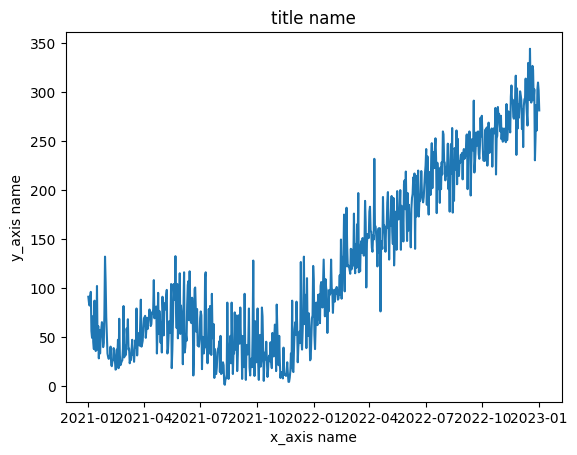

In [23]:
## starting in 2021
plt.plot(day_map.keys(), day_map.values())
plt.title('Crossbuy Patterns Over Time')
plt.xlabel('Date of Second Product Adoption')
plt.ylabel('Median Days Between First and Second Product')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [55]:
relay = xbuy[xbuy['first_product'] == 'relay']
plt.hist(x=relay['xbuy_days'], bins='auto', color='#0504aa')
plt.plot(axis='y')
plt.title('Crossbuy From Relay')
plt.xlabel('Days Between First and Second Product')
plt.ylabel('Count')
plt.xlim(left=-1, right=500)
plt.ylim(bottom=0, top=1000)
plt.show()

KeyboardInterrupt: 

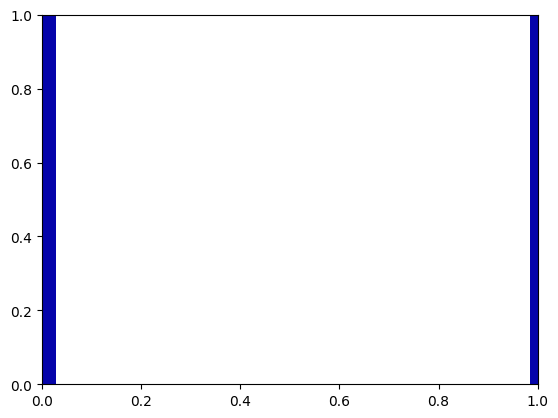

In [7]:
# select only the relay rows where crossbuy date is in the year 2022
relay = relay[(relay['xbuy_date'] >= '2022-01-01') & (relay['xbuy_date'] <= '2022-12-31')]
plt.hist(x=relay['xbuy_days'], bins='auto', color='#0504aa')
plt.plot(axis='y')
plt.title('Crossbuy From Relay')
plt.xlabel('Days Between First and Second Product')
plt.ylabel('Count')
plt.xlim(left=0, right=2000)
plt.show()

In [ ]:
# make different dataframes for each year of xbuy_date where relay is the first product
relay_2021 = relay[(relay['xbuy_date'] >= '2021-01-01') & (relay['xbuy_date'] <= '2021-12-31')]
relay_2022 = relay[(relay['xbuy_date'] >= '2022-01-01') & (relay['xbuy_date'] <= '2022-12-31')]
relay_2023 = relay[(relay['xbuy_date'] >= '2023-01-01') & (relay['xbuy_date'] <= '2023-12-31')]
relay_2020 = relay[(relay['xbuy_date'] >= '2020-01-01') & (relay['xbuy_date'] <= '2020-12-31')]
relay_2019 = relay[(relay['xbuy_date'] >= '2019-01-01') & (relay['xbuy_date'] <= '2019-12-31')]
relay_2018 = relay[(relay['xbuy_date'] >= '2018-01-01') & (relay['xbuy_date'] <= '2018-12-31')]

# make a plot for each year where xbuy_date is the x and xbuy_days is the y
plt.hist(x=relay_2018['xbuy_days'], bins='auto', color='#0504aa')
plt.plot(axis='y')
plt.title('Crossbuy From Relay')
plt.xlabel('Days Between First and Second Product')
plt.ylabel('Count')
plt.xlim(left=0, right=2000)
plt.show()

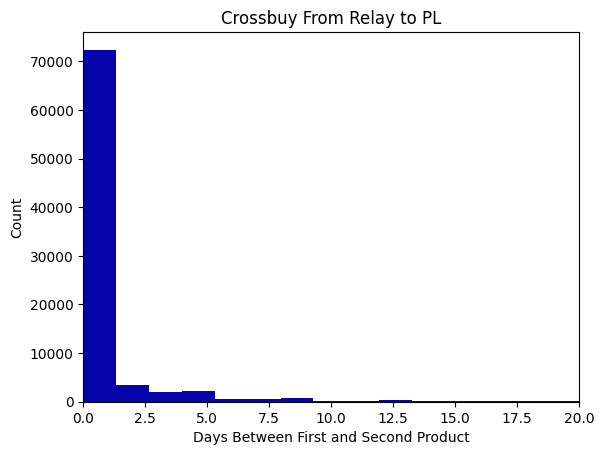

In [39]:
relay_pl = xbuy[xbuy['first_product'] == 'relay']
relay_pl =  relay_pl[relay_pl['second_product'] == 'loan']
plt.hist(x=relay_pl['xbuy_days'], bins=2500, color='#0504aa')
plt.plot(axis='y')
plt.title('Crossbuy From Relay to PL')
plt.xlabel('Days Between First and Second Product')
plt.ylabel('Count')
plt.xlim(left=0, right=20)
plt.show()

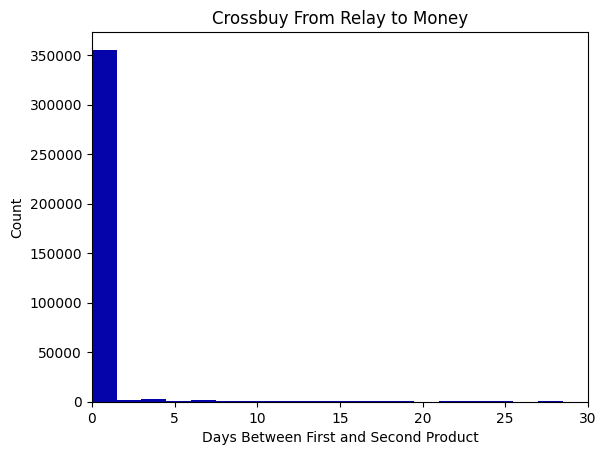

In [52]:
relay_money = xbuy[xbuy['first_product'] == 'relay']
relay_money = relay_money[relay_money['second_product'] == 'money']
plt.hist(x=relay_money['xbuy_days'], bins=2500, color='#0504aa')
plt.plot(axis='y')
plt.title('Crossbuy From Relay to Money')
plt.xlabel('Days Between First and Second Product')
plt.ylabel('Count')
plt.xlim(left=0, right=30)
plt.show()

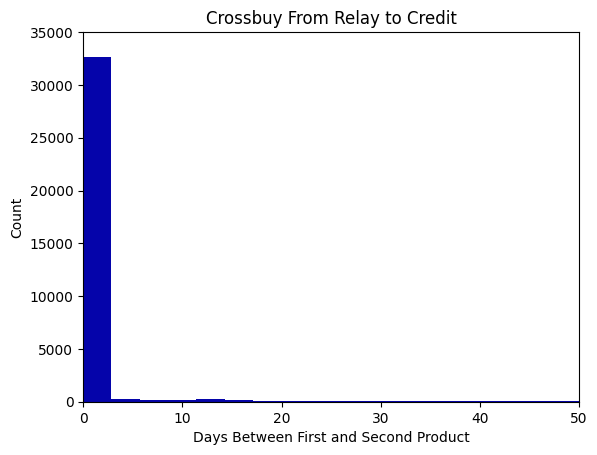

In [51]:
relay_credit = xbuy[xbuy['first_product'] == 'relay']
relay_credit = relay_credit[relay_credit['second_product'] == 'credit']
plt.hist(x=relay_credit['xbuy_days'], bins=1000, color='#0504aa')
plt.plot(axis='y')
plt.title('Crossbuy From Relay to Credit')
plt.xlabel('Days Between First and Second Product')
plt.ylabel('Count')
plt.xlim(left=0, right=50)
plt.ylim(bottom=0, top=35000)
plt.show()

In [41]:
relay_credit

,ROW_NUM,USER_ID,INV_OPEN_DATE,INV_NUM_ACCOUNTS,INV_ACC_BAL,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,MONEY_FICO,MONEY_DATA_UPDATE_DATE,MONEY_TOTAL_BALANCE,...,date_of_creating_new_columns,days_with_invest,days_with_money,days_with_relay,days_with_loan,days_with_credit,first_product,second_product,xbuy_days,xbuy_date
238,1.0,20279052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,548.0,NaN,547.0,relay,credit,1.0,2021-10-04
239,1.0,20279155.0,2021-10-07,2.0,117687.17,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,544.0,NaN,548.0,NaN,547.0,relay,credit,1.0,2021-10-04
245,1.0,20279516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,547.0,NaN,547.0,relay,credit,0.0,2021-10-04
247,1.0,20279619.0,NaN,NaN,NaN,2021-12-31,Active,723.0,2023-04-02,3.10,...,2023-04-04,NaN,459.0,547.0,NaN,547.0,relay,credit,0.0,2021-10-04
252,1.0,20279919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,545.0,NaN,545.0,relay,credit,0.0,2021-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117728,1.0,27802153.0,NaN,NaN,NaN,2023-02-18,Active,682.0,2023-04-02,60.92,...,2023-04-04,NaN,45.0,73.0,NaN,72.0,relay,credit,1.0,2023-01-22
3117757,1.0,27816719.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,72.0,NaN,72.0,relay,credit,0.0,2023-01-22
3117765,1.0,27820562.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,72.0,NaN,68.0,relay,credit,4.0,2023-01-26
3117778,1.0,27824055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-04-04,NaN,NaN,72.0,NaN,72.0,relay,credit,0.0,2023-01-22


In [21]:
statistics.median(relay_pl['xbuy_days'])

0.0

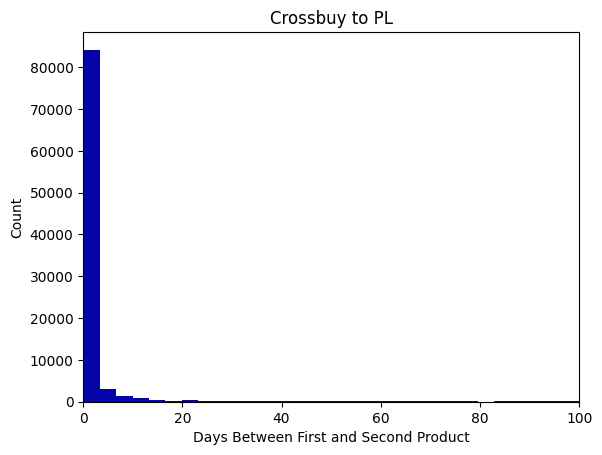

In [32]:
pl_second = xbuy[xbuy['second_product'] == 'loan']
plt.hist(x=pl_second['xbuy_days'], bins=1000, color='#0504aa')
plt.plot(axis='y')
plt.title('Crossbuy to PL')
plt.xlabel('Days Between First and Second Product')
plt.ylabel('Count')
plt.xlim(left=0, right=100)
plt.show()

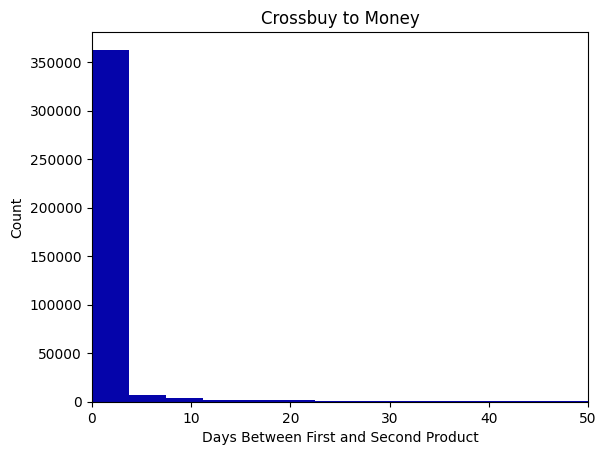

In [30]:
money_second = xbuy[xbuy['second_product'] == 'money']
plt.hist(x=money_second['xbuy_days'], bins=1000, color='#0504aa')
plt.plot(axis='y')
plt.title('Crossbuy to Money')
plt.xlabel('Days Between First and Second Product')
plt.ylabel('Count')
plt.xlim(left=0, right=50)
plt.show()

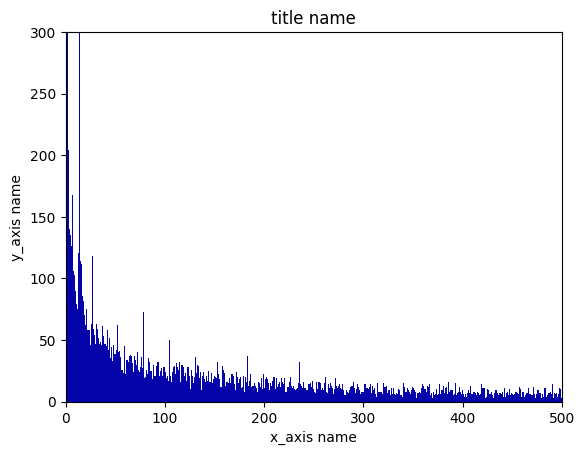

In [26]:
credit_second = xbuy[xbuy['second_product'] == 'credit']
plt.hist(x=credit_second['xbuy_days'], bins='auto', color='#0504aa')
plt.plot(axis='y')
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.xlim(left=0, right=500)
plt.ylim(bottom=0, top=300)
plt.show()